![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [118]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


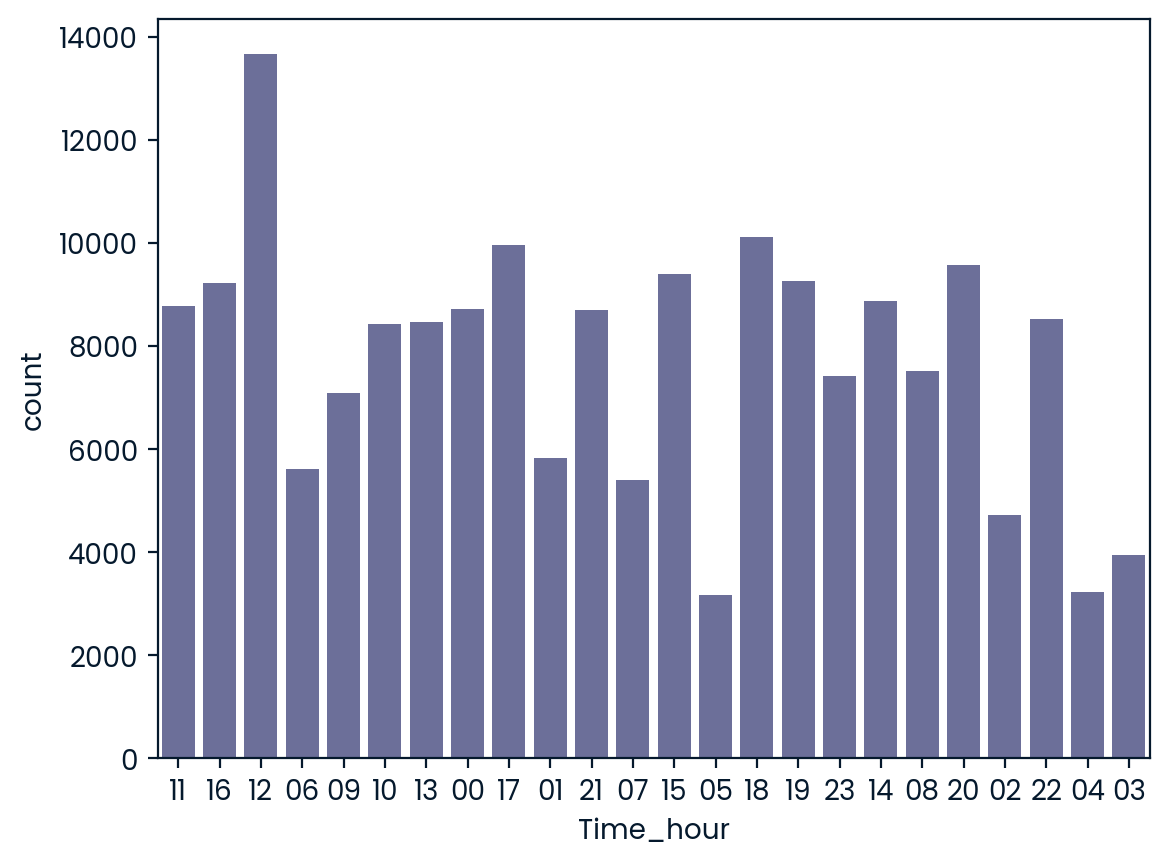

12
       DR_NO  Date Rptd  ...                                 LOCATION Time_hour
0  220314085 2022-07-22  ...  2500 S  SYCAMORE                     AV        11
1  222013040 2022-08-06  ...  3300    SAN MARINO                   ST        16
2  220614831 2022-08-18  ...                        1900    TRANSIENT        12
3  231207725 2023-02-27  ...  6200    4TH                          AV         6
4  220213256 2022-07-14  ...  1200 W  7TH                          ST         9

[5 rows x 13 columns]
xxxxxxxxx
        DR_NO  Date Rptd  ...                                  LOCATION Time_hour
8   231207476 2023-02-27  ...   8800    HAAS                         AV         0
10  221711184 2022-06-15  ...   8300    WHITE OAK                    AV         1
30  221314362 2022-07-11  ...   1600 E  OLYMPIC                      BL         0
33  231307252 2023-03-03  ...                          6600 S  BROADWAY        23
36  221614254 2022-11-13  ...  10200    TELFAIR                      AV   

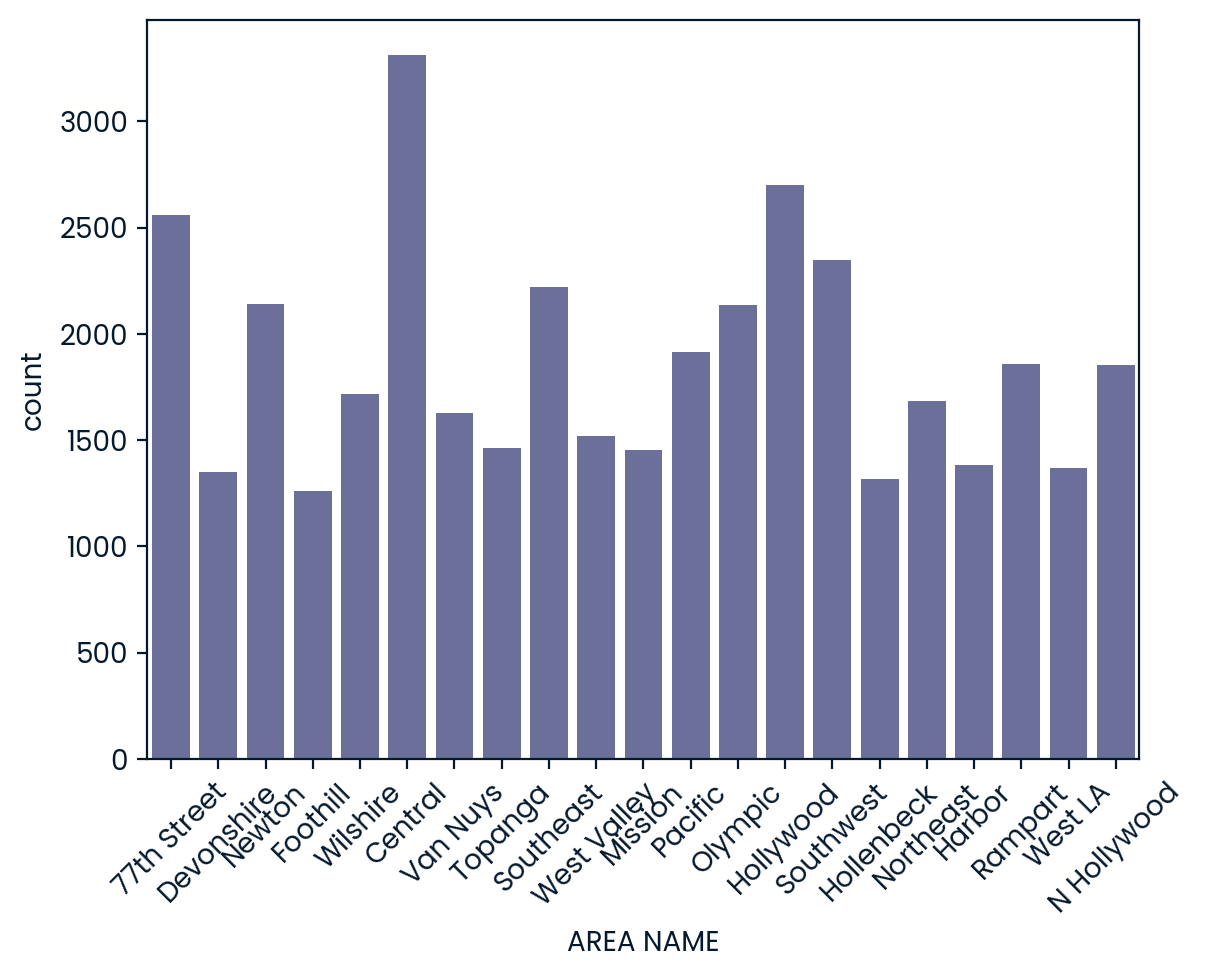

Central
xxxxxxxxxage17
xxxxxxxxxage25
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: victim_ages-category, dtype: int64


In [119]:
# Start coding here
# Use as many cells as you need

##### the highest frequency of crimes
# extraire les deux premiers chiffres le time occ pour avoir l'heure sans les minutes
crimes["Time_hour"] =  crimes["TIME OCC"].str.slice(0, 2)
#crimes.head()
# dessiner pour voir le taux le plus haut afin de voir la réponse d'avance
sns.countplot(data=crimes, x="Time_hour")
plt.show()
# faire le compte et l'enregistrer
#print(crimes["Time_hour"].value_counts())
#print(crimes["Time_hour"].value_counts().index[0])
crimes["Time_hour"] = crimes["Time_hour"].astype(int)
peak_crime_hour = crimes["Time_hour"].value_counts().index[0]
print(peak_crime_hour)


##### area has the largest frequency
# categoriser les heures de crimes en 4 catégories 22-4 tard 4-10 reveil 10-16 journée 16-22 soirée
#crimes["TIME OCC"] = crimes["TIME OCC"].astype(int)
print(crimes.head())
print("xxxxxxxxx")
#crimes_soir1 = crimes[crimes["Time_hour"] >= 22]
#print(crimes_soir1.head())
#print("xxxxxxxxx")
#crimes_soir2 = crimes[crimes["Time_hour"] < 4]
#print(crimes_soir["Time_hour"].value_counts())
#print(crimes_soir2.head())
#print("xxxxxxxxx")
crimes_night = crimes[(crimes["Time_hour"] >= 22) + (crimes["Time_hour"] < 0o4)]
print(crimes_night.head())
sns.countplot(data=crimes_night, x="AREA NAME")
plt.xticks(rotation=45)
plt.show()
peak_night_crime_location = crimes_night["AREA NAME"].value_counts().index[0]
print(peak_night_crime_location)


# number of crimes committed against victims of different age groups
print("xxxxxxxxxage17")
crimes["Vict Age"] = crimes["Vict Age"].astype(int)
age_0_17 = crimes[crimes["Vict Age"] <= 17]
#print(age_0_17.head())
print("xxxxxxxxxage25")
age_18_25 = crimes[(crimes["Vict Age"] > 17) & (crimes["Vict Age"] <= 25)]
#age_18_25.head()
age_26_34 = crimes[(crimes["Vict Age"] > 25) & (crimes["Vict Age"] <= 34)]
#age_26_34.head()
age_26_34 = crimes[(crimes["Vict Age"] > 25) & (crimes["Vict Age"] <= 34)]
#age_26_34.head()
age_35_44 = crimes[(crimes["Vict Age"] > 34) & (crimes["Vict Age"] <= 44)]
#age_35_44.head()
age_45_54 = crimes[(crimes["Vict Age"] > 44) & (crimes["Vict Age"] <= 54)]
#age_45_54.head()
age_55_64 = crimes[(crimes["Vict Age"] > 54) & (crimes["Vict Age"] <= 64)]
#age_55_64.head()
age_65 = crimes[crimes["Vict Age"] >= 65]
#age_65.head()
labels=["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]
#bins = [0, age_0_17, age_18_25, age_26_34, age_35_44, age_45_54, age_55_64, age_65]
bins = [0, 17, 25, 34, 44, 54, 64, 150]
crimes["victim_ages-category"] = pd.cut(crimes["Vict Age"], labels=labels, bins=bins)
crimes.head(200)
victim_ages = crimes["victim_ages-category"].value_counts()
#print(crimes.head(200))
print(victim_ages)
#victim_ages = 